# 📊 AirComm Insight Engine – Visual Dashboard Template
This notebook demonstrates how to extract insights from a SQLite database and visualize them using Matplotlib as a mock dashboard layout.

In [2]:
# 📦 Step 1: Connect to SQLite DB and Load Tables
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect('../data/aircomm_insight.db')

## 1️⃣ Avg Response Time by Region

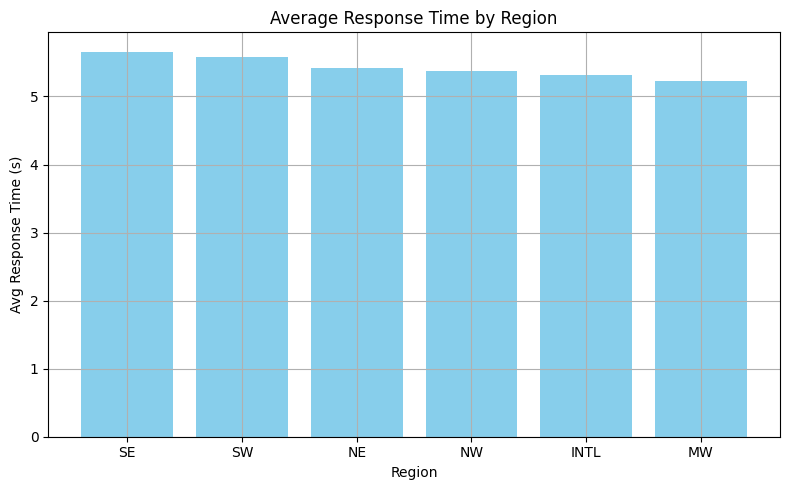

In [3]:
query1 = '''
SELECT region, ROUND(AVG(response_time), 2) AS avg_response_time
FROM aircraft_logs
GROUP BY region
ORDER BY avg_response_time DESC;
'''

df1 = pd.read_sql_query(query1, conn)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(df1['region'], df1['avg_response_time'], color='skyblue')
plt.title('Average Response Time by Region')
plt.xlabel('Region')
plt.ylabel('Avg Response Time (s)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 2️⃣ Top 5 Aircraft with Most Errors

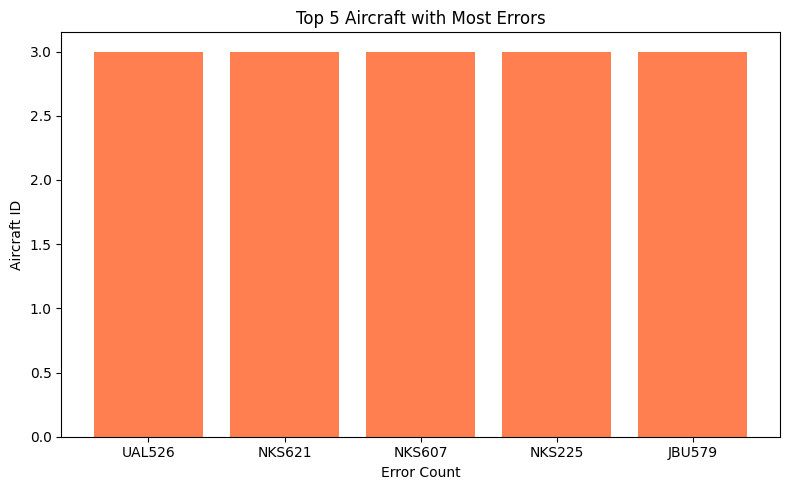

In [4]:
query2 = '''
SELECT aircraft_id, COUNT(*) AS error_count
FROM aircraft_logs
WHERE error_code != 0
GROUP BY aircraft_id
ORDER BY error_count DESC
LIMIT 5;
'''

df2 = pd.read_sql_query(query2, conn)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(df2['aircraft_id'], df2['error_count'], color='coral')
plt.title('Top 5 Aircraft with Most Errors')
plt.xlabel('Error Count')
plt.ylabel('Aircraft ID')
plt.tight_layout()
plt.show()

## 3️⃣ Weak Signal vs RF Coverage by Region

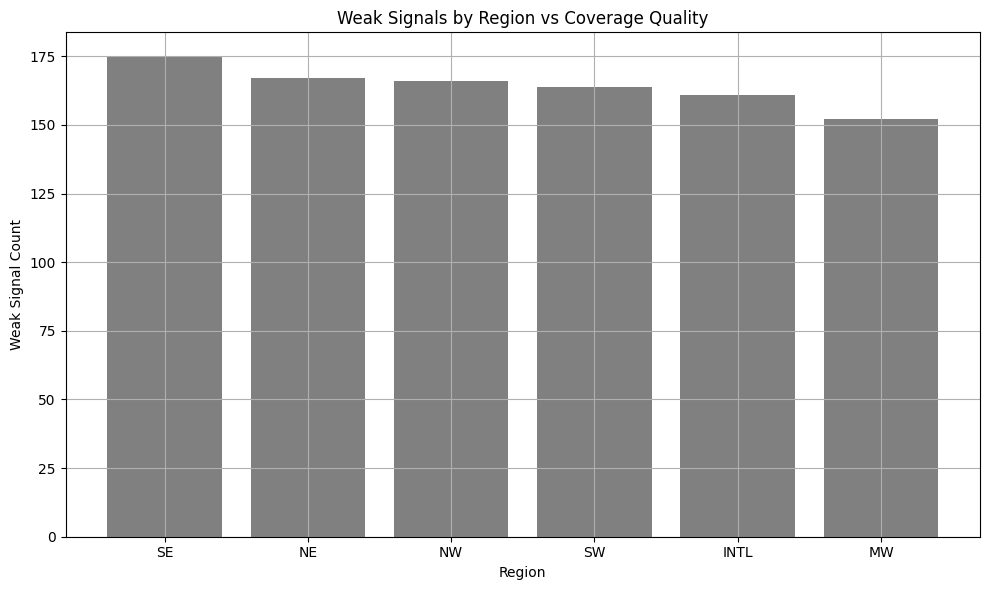

In [5]:
query3 = '''
SELECT 
    l.region,
    z.coverage_quality,
    COUNT(*) AS total_logs,
    SUM(CASE WHEN l.signal_strength < -90 THEN 1 ELSE 0 END) AS weak_signals
FROM aircraft_logs l
JOIN rf_coverage_zones z ON l.region = z.region
GROUP BY l.region, z.coverage_quality
ORDER BY weak_signals DESC;
'''

df3 = pd.read_sql_query(query3, conn)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df3['region'], df3['weak_signals'], color='gray')
plt.title('Weak Signals by Region vs Coverage Quality')
plt.xlabel('Region')
plt.ylabel('Weak Signal Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
import sqlite3
import pandas as pd

# Connect to your SQLite database
#conn = sqlite3.connect("data/aircomm_insight.db")  # update path if needed

# Run the diagnostic query
query_diagnostic_check = """
SELECT aircraft_id, COUNT(*) AS error_count
FROM aircraft_logs
WHERE error_code != 0
GROUP BY aircraft_id
ORDER BY error_count DESC
LIMIT 10;
"""

df = pd.read_sql(query_diagnostic_check, conn)
#conn.close()

# Show the result
print(df)


  aircraft_id  error_count
0      UAL526            3
1      NKS621            3
2      NKS607            3
3      NKS225            3
4      JBU579            3
5      FFT847            3
6      DAL152            3
7      AAL899            3
8      UAL973            2
9      UAL910            2


In [7]:
#conn = sqlite3.connect("data/aircomm_insight.db") 
query_top_airline = """
SELECT 
    e.airline_name,
    COUNT(*) AS error_count
FROM aircraft_logs l
JOIN aircraft_metadata_enriched e ON l.aircraft_id = e.aircraft_id
WHERE l.error_code != 0
GROUP BY e.airline_name
ORDER BY error_count DESC
LIMIT 5;

"""

df_top_airline = pd.read_sql(query_top_airline, conn)
#conn.close()

# Show the result
print(df_top_airline)


         airline_name  error_count
0     Spirit Airlines          213
1     United Airlines          207
2  Southwest Airlines          200
3   Frontier Airlines          200
4             JetBlue          198


C:\Users\Moe\AppData\Local\Temp\ipykernel_16308\4289753446.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_airline, x="error_count", y="airline_name", palette="Reds")


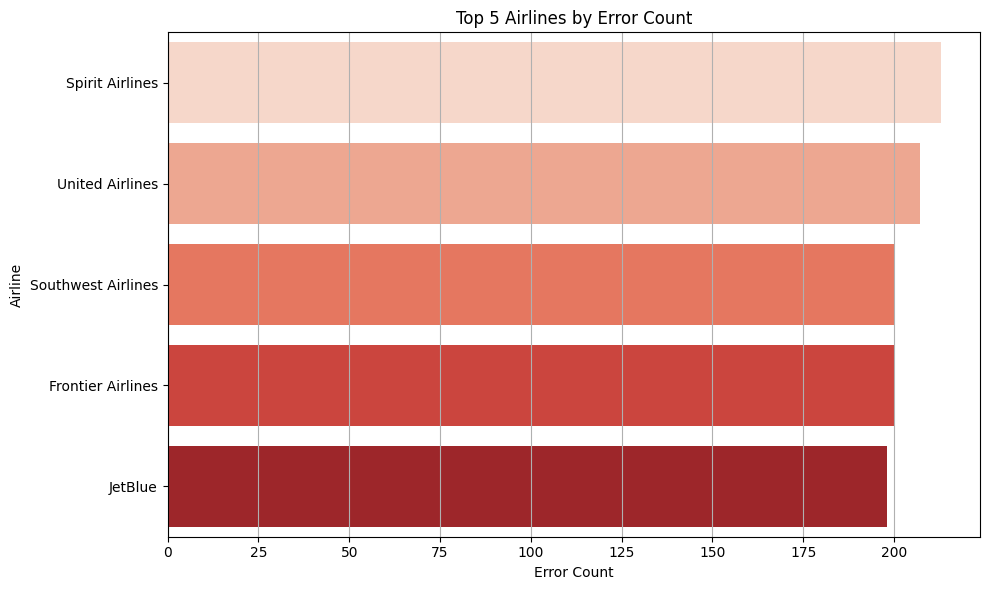

In [39]:
import seaborn as sns
# 📊 Plot: Top 5 Airlines by Error Count
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_airline, x="error_count", y="airline_name", palette="Reds")
plt.title("Top 5 Airlines by Error Count")
plt.xlabel("Error Count")
plt.ylabel("Airline")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [37]:
query_weak_signals = """
SELECT 
    e.hub,
    COUNT(*) AS weak_signal_count
FROM aircraft_logs l
JOIN aircraft_metadata_enriched e ON l.aircraft_id = e.aircraft_id
WHERE l.signal_strength < -90
GROUP BY e.hub
ORDER BY weak_signal_count DESC;

"""

df_weak_signals = pd.read_sql(query_weak_signals, conn)
#conn.close()

# Show the result
print(df_weak_signals)



   hub  weak_signal_count
0  FLL                148
1  DFW                147
2  DEN                146
3  ATL                142
4  JFK                139
5  DAL                135
6  ORD                128


C:\Users\Moe\AppData\Local\Temp\ipykernel_16308\1600208477.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_weak_signals, y="hub", x="weak_signal_count", palette="flare")


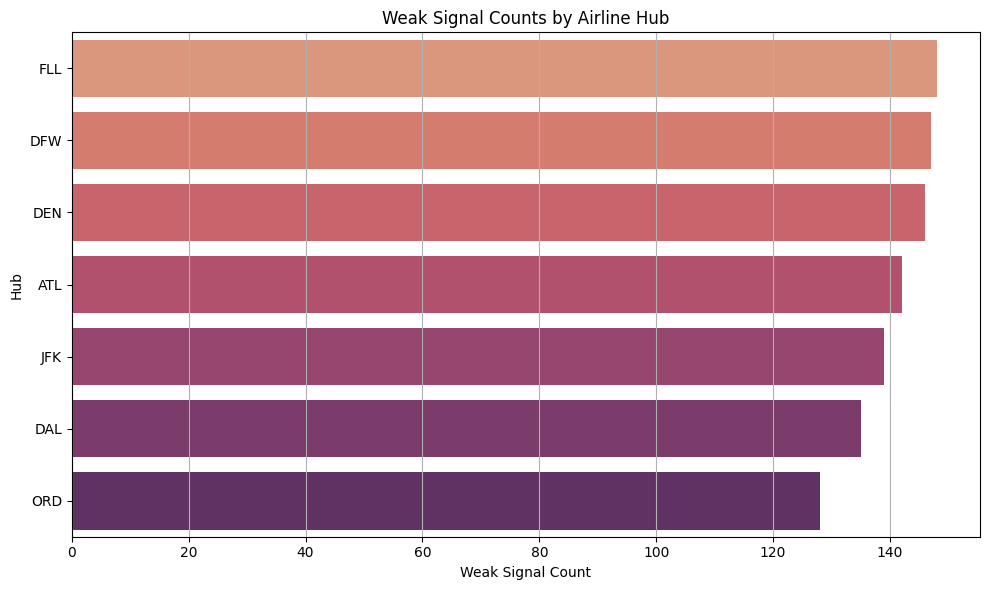

In [38]:
import seaborn as sns
# 📊 Horizontal Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_weak_signals, y="hub", x="weak_signal_count", palette="flare")
plt.title("Weak Signal Counts by Airline Hub")
plt.xlabel("Weak Signal Count")
plt.ylabel("Hub")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [8]:
query_avg_response_time = """
SELECT 
    e.airline_name,
    e.fleet_size,
    ROUND(AVG(l.response_time), 2) AS avg_response_time
FROM aircraft_logs l
JOIN aircraft_metadata_enriched e ON l.aircraft_id = e.aircraft_id
GROUP BY e.airline_name, e.fleet_size
ORDER BY avg_response_time DESC;

"""

df_avg_response_time = pd.read_sql(query_avg_response_time, conn)
#conn.close()

# Show the result
print(df_avg_response_time)


         airline_name  fleet_size  avg_response_time
0     Spirit Airlines         250               5.63
1     United Airlines         850               5.56
2   Frontier Airlines         200               5.50
3             JetBlue         300               5.41
4     Delta Air Lines         900               5.38
5  Southwest Airlines         700               5.29
6   American Airlines         950               5.25


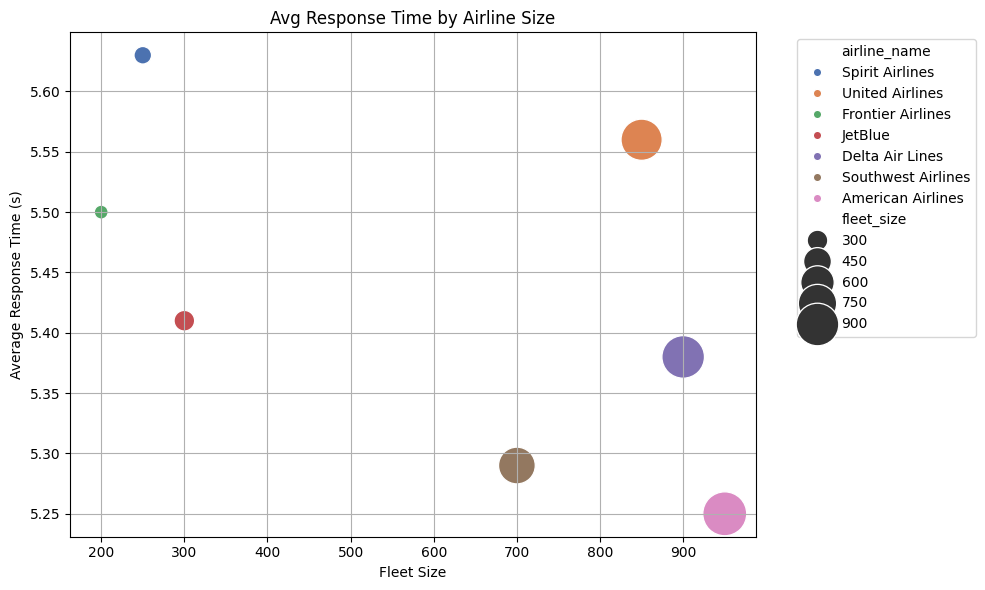

In [9]:
import seaborn as sns
# 📈 Bubble Chart: Avg Response Time vs Fleet Size
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_avg_response_time,
    x="fleet_size",
    y="avg_response_time",
    hue="airline_name",
    size="fleet_size",
    sizes=(100, 1000),
    palette="deep",
    legend="brief"
)
plt.title("Avg Response Time by Airline Size")
plt.xlabel("Fleet Size")
plt.ylabel("Average Response Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
query_region_vs_model = """
SELECT 
    l.region,
    e.model,
    COUNT(*) AS error_events
FROM aircraft_logs l
JOIN aircraft_metadata_enriched e ON l.aircraft_id = e.aircraft_id
WHERE l.error_code != 0
GROUP BY l.region, e.model
ORDER BY error_events DESC
LIMIT 10;

"""

df_region_vs_model = pd.read_sql(query_region_vs_model, conn)
#conn.close()

# Show the result
print(df_region_vs_model)
conn.close()  # Close the connection to the database

  region     model  error_events
0     NE      A319            46
1     NE      A321            44
2     SW  B737-MAX            43
3     NW   A320neo            41
4     SE      A319            40
5     SE      B757            40
6     MW      B757            39
7     NE      B757            39
8     SE  B737-800            39
9     NE  B737-MAX            38


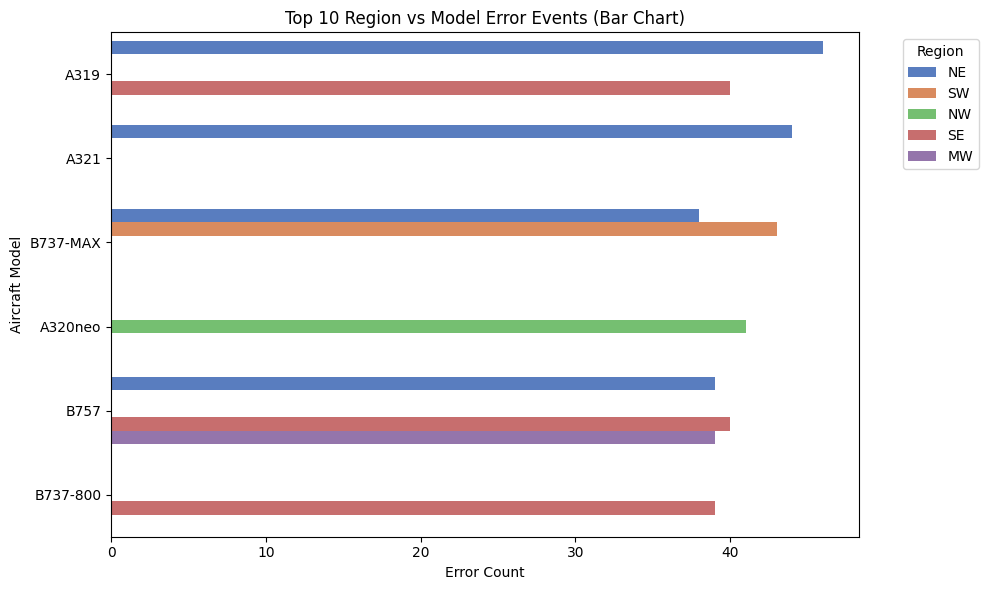

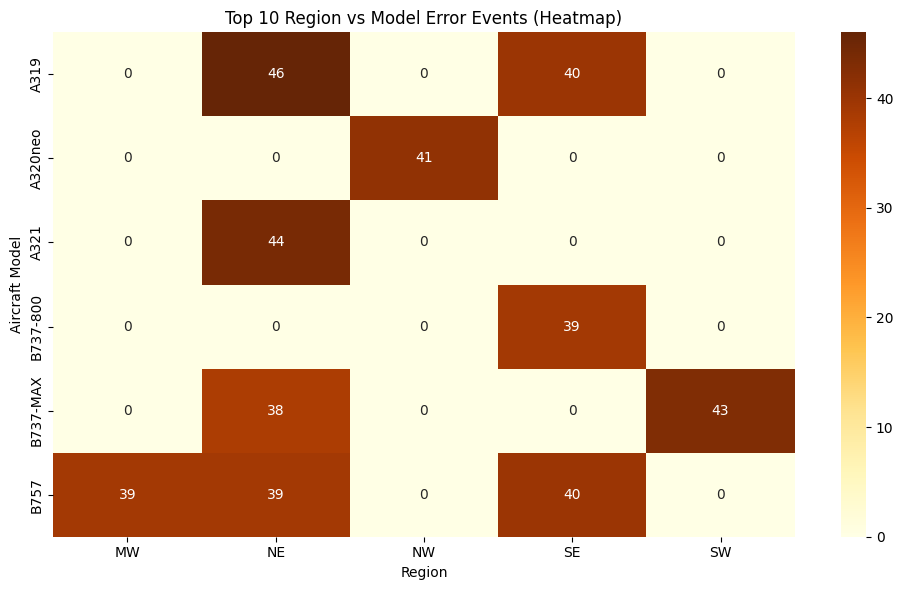

In [12]:
import seaborn as sns
# -------------------------------
# 📊 BAR CHART: Region vs Model
# -------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(data=df_region_vs_model, x="error_events", y="model", hue="region", palette="muted")
plt.title("Top 10 Region vs Model Error Events (Bar Chart)")
plt.xlabel("Error Count")
plt.ylabel("Aircraft Model")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -------------------------------
# 🔥 HEATMAP: Region vs Model
# -------------------------------
pivot_df = df_region_vs_model.pivot(index="model", columns="region", values="error_events").fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="YlOrBr")
plt.title("Top 10 Region vs Model Error Events (Heatmap)")
plt.xlabel("Region")
plt.ylabel("Aircraft Model")
plt.tight_layout()
plt.show()